# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

In [2]:
from DLtools import  prep_data, LSTMmodel

In [6]:
rain = 'data/instant_data/rain.csv'
water = 'data/instant_data/water.csv'
rw = prep_data.instant_df(rain_csv=rain,water_csv=water)
# df_water = rw.water_df
# df_rain = rw.rain_df
df = rw.df

In [7]:
# SELECT YEAR
rw.report_missing_by_year()

avaliable data in *2007* is ........113150.00 || missing....100.00%
avaliable data in *2008* is ........113460.00 || missing....100.00%
avaliable data in *2009* is ........113150.00 || missing....100.00%
avaliable data in *2010* is ........113150.00 || missing....99.90%
avaliable data in *2011* is ........113150.00 || missing....99.45%
avaliable data in *2012* is ........113460.00 || missing....82.41%
avaliable data in *2013* is ........113150.00 || missing....63.59%
avaliable data in *2014* is ........113150.00 || missing....59.96%
avaliable data in *2015* is ........113150.00 || missing....61.88%
avaliable data in *2016* is ........113460.00 || missing....61.95%
avaliable data in *2017* is ........113150.00 || missing....62.09%
avaliable data in *2018* is ........113150.00 || missing....61.79%
avaliable data in *2019* is ........113150.00 || missing....54.65%
avaliable data in *2020* is ........66030.00 || missing....54.55%


In [8]:
rw = prep_data.instant_df(rain_csv=rain,water_csv=water,start='2013')
df = rw.df

In [55]:
# def report_missing_by_station(df,col):
#     nan_ratio = 0.15
#     print(col[:5])
#     for _col in df.columns:   
#         num_nan = df[_col].isnull().sum()
#         num_total = df.shape[0]
#         if num_nan/num_total > nan_ratio:
#             try:
#                 col.remove(_col)
#             except:
#                 pass
#         else:
#             print("REMAIN Station name {}, ,missing......{} (..{:.2f}%)".format(_col,num_nan,num_nan*100/num_total))
#     print("total data points",num_total)
#     print("remain .......{}...station".format(len(col)))
#     print(col)
#     return col

In [9]:
# print(len(all_col))
# print("ST........AVAL..NAN..ALL.............avaliable ratio")
# all_col = df.columns
# for col in all_col:
#     avaliable = df[col].count()
#     nan = df[col].isna().sum()
#     total = len(df[col])
    
#     if nan/total > 0.3 :
#         print(col,avaliable,nan,total,"................",nan/total*100)
#         try:
#             col.remove(all_col)
#         except:
#             pass
# print(len(all_col))

In [11]:
rw.report_missing_by_station()

***From current station 0 list below, find and discard station that too much missingdata 

missing data over 15.0%, as below
total data points 5538
remain .......0...station
[]
***From current station 0 list below, find and discard station that too much missingdata 

missing data over 15.0%, as below
total data points 5538
remain .......0...station
[]


In [66]:
#df = df.interpolate(method='pad', limit=30) # selected period, interporlation missing value
#df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df = df.fillna(0)
df.head()


(2190, 155)


,NAN014_w,CPY005_w,TB0002_w,BKK018_w,CPY001_w,CHM002_w,GLF001_w,TBW014_w,CHM006_w,CPY012_w,...,CPY012_r,NAN007_r,LBI002_r,CPY003_r,BKK013_r,HDA005_r,NAN003_r,CPY014_r,CPY016_r,NAN001_r
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,4.932222,0.0,0.0,19.206993,292.511049,0.0,0.0,0.0,1.123776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.0,4.928611,0.0,0.0,19.103000,292.511329,0.0,0.0,0.0,0.992292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,0.0,4.909306,0.0,0.0,19.168333,292.510000,0.0,0.0,0.0,0.972431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,0.0,4.895139,0.0,0.0,19.200069,292.510000,0.0,0.0,0.0,0.864583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,0.0,4.894653,0.0,0.0,19.241806,292.510699,0.0,0.0,0.0,0.892014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LSTM

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [68]:
# print("********RAIN_BEFORE********")
# print("Min: ", np.min(df))
# print("Max: ", np.max(df))
#print("********RAIN_AFTER********")
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
#y = scaler.fit_transform(y)
print("Min: ", np.min(df))
print("Max: ", np.max(df))

Min:  NAN014_w    0.0
CPY005_w    0.0
TB0002_w    0.0
BKK018_w    0.0
CPY001_w    0.0
           ... 
HDA005_r    0.0
NAN003_r    0.0
CPY014_r    0.0
CPY016_r    0.0
NAN001_r    0.0
Length: 155, dtype: float64
Max:  NAN014_w    1.0
CPY005_w    1.0
TB0002_w    1.0
BKK018_w    1.0
CPY001_w    1.0
           ... 
HDA005_r    0.0
NAN003_r    1.0
CPY014_r    1.0
CPY016_r    1.0
NAN001_r    1.0
Length: 155, dtype: float64


In [69]:
timelag = 7
y = df['CPY015_w'].shift(-timelag)

In [70]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (2183, 155)
********************
<class 'numpy.ndarray'>
Shape: (2183, 1)


In [71]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 2183
Train: 1746 , Test: 437
x_train shape (1746, 155)
y_train shape (1746, 1)
x feature.... 155
y feature.... 1


In [72]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [73]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 155)
(256, 7, 1)


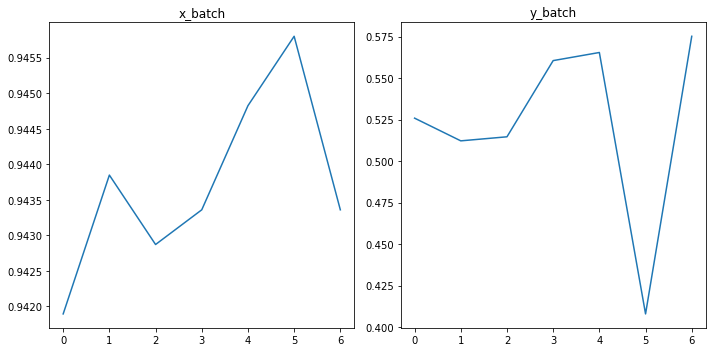

In [74]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [75]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 437, 155)
y_test shape: (1, 437, 1)


In [76]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         145408    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense (Dense)                (None, None, 1)           129       
Total params: 277,121
Trainable params: 277,121
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(x=generator,
          epochs=100,
          steps_per_epoch=10,validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 1s 101ms/step - loss: 0.0769 - accuracy: 5.0223e-04 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 45ms/step - loss: 0.0348 - accuracy: 3.9063e-04 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0200 - accuracy: 6.1384e-04 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 47ms/step - loss: 0.0126 - accuracy: 3.3482e-04 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0092 - accuracy: 5.5804e-04 - val_loss: 7.1742e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0066 - accuracy: 4.4643e-04 - val_loss: 4.2324e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0055 - accuracy

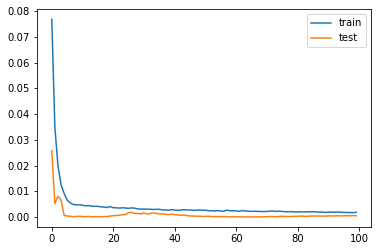

In [78]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

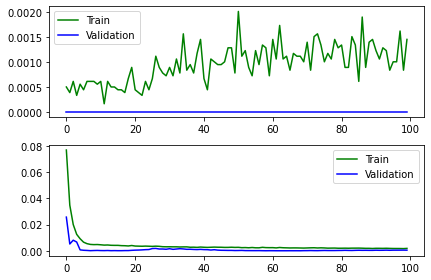

In [79]:
plt.subplot(211)
#
plt.plot(history.history['accuracy'],color="g", label="Train" )
plt.plot(history.history['val_accuracy'],color="b", label="Validation" )
plt.legend(loc='best')

plt.subplot(212)
#
plt.plot(history.history['loss'], color = 'g', label='Train')
plt.plot(history.history['val_loss'], color = 'b', label='Validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show